## OMXS30 Volatility Estimation using FIGARCH Model and Implied Volatility

In [36]:
import pandas as pd
import numpy as np

In [164]:
ind_rets = pd.read_csv("SX5E_OMXS30_drets_vol.csv",
                      header=0, index_col=0, parse_dates=True).dropna()
ind_rets.index = pd.to_datetime(ind_rets.index, format="%Y%m%d")

In [166]:
from arch import arch_model
omxs_rets = ind_rets['OMXS30']
fm = arch_model(omxs_rets, vol='Figarch')
res = fm.fit(update_freq=5)
figarch_omxs_vol = 16.096733 * res.conditional_volatility['2015-11-28':]
rolling_vol = omxs_rets.rolling(window=30).std() * np.sqrt(252)

Iteration:      5,   Func. Count:     42,   Neg. LLF: 3569.8742450116706
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3566.488251283297
            Iterations: 9
            Function evaluations: 68
            Gradient evaluations: 9


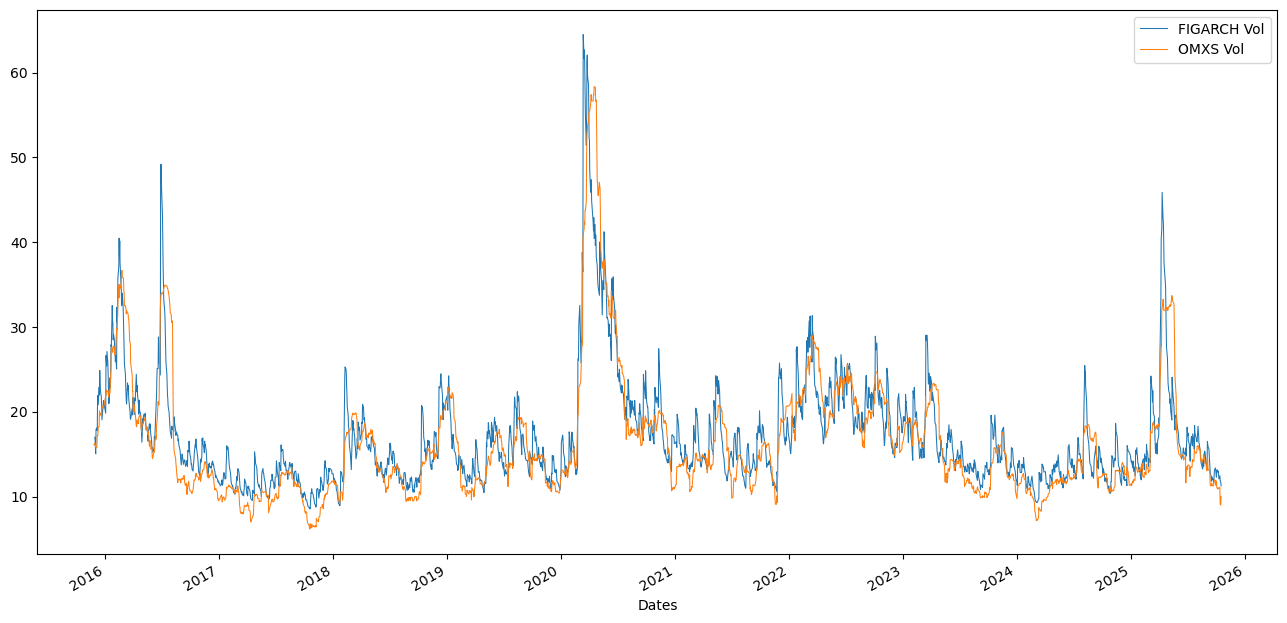

In [168]:
ax = figarch_omxs_vol.plot(figsize=(16,8), label='FIGARCH Vol', linewidth=0.75)
rolling_vol.plot(ax=ax, label='OMXS Vol', linewidth=0.75)
ax.legend()

Mean Spread:  -0.7756


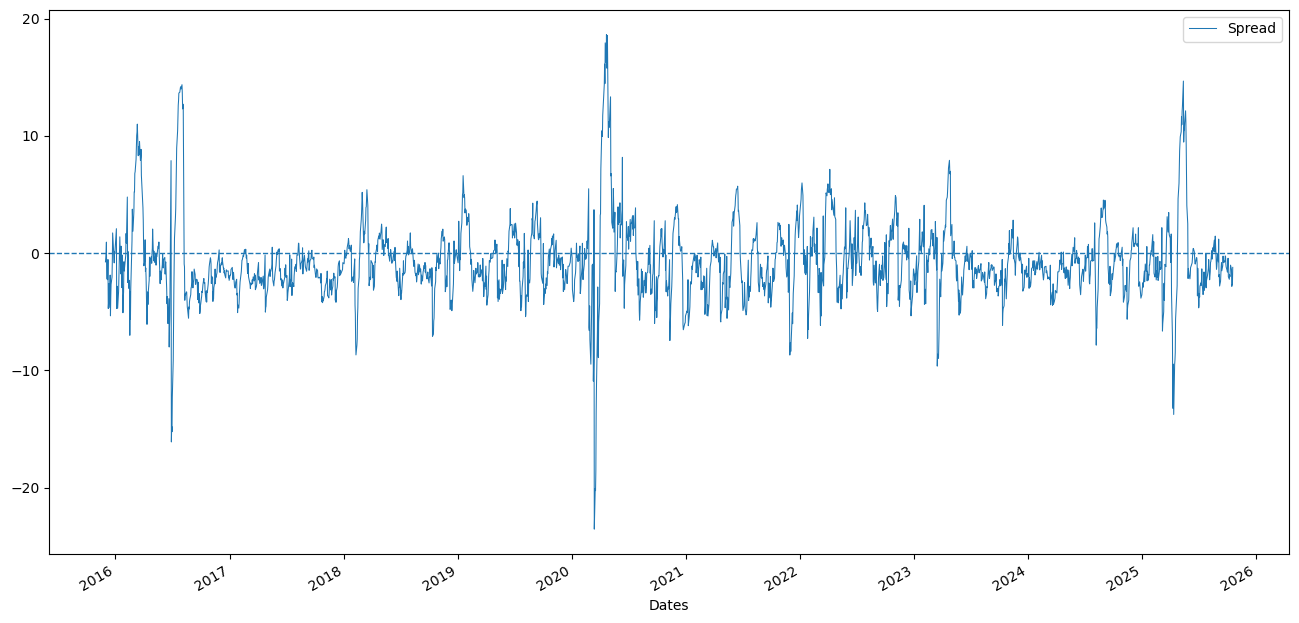

In [172]:
spread = rolling_vol - figarch_omxs_vol
mean = spread.mean()

ax = spread.plot(figsize=(16,8), label='Spread', linewidth=.75)
ax.axhline(0, linestyle='--', linewidth=1)
ax.legend()

print(f"Mean Spread:  {mean:.4f}")

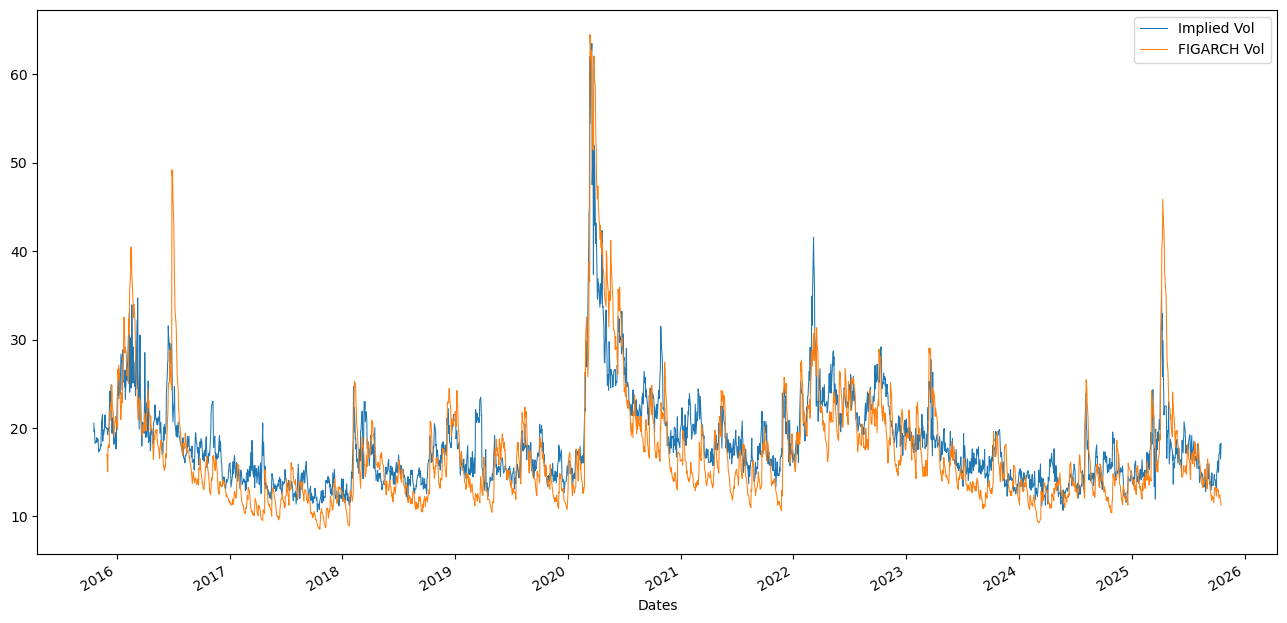

In [181]:
omxs_IV = ind_rets['OMXS30_IV']

ax = omxs_IV.plot(figsize=(16,8), label='Implied Vol', linewidth=0.75)
figarch_omxs_vol.plot(ax=ax, label='FIGARCH Vol', linewidth=0.75)
ax.legend()

Mean Spread:  1.0751
Std Spread:  3.6776


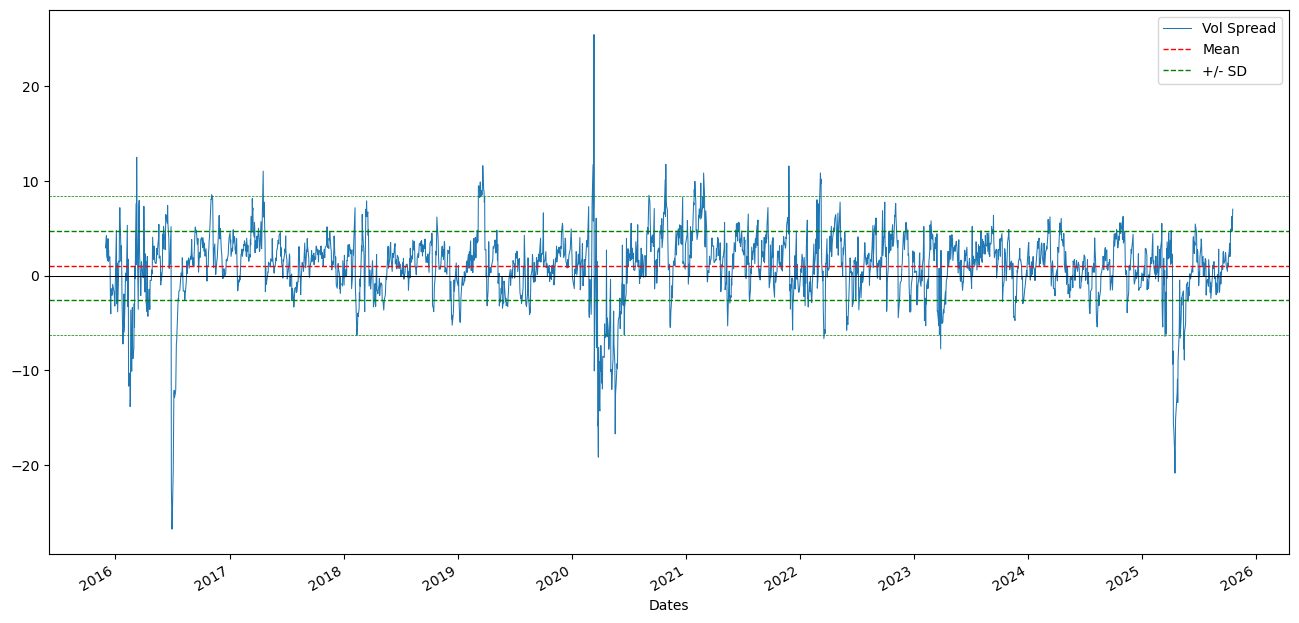

In [263]:
spread_IV = omxs_IV - figarch_omxs_vol
mean_IV = spread_IV.mean()
std_IV = spread_IV.std()

ax = spread_IV.plot(figsize=(16,8), label='Vol Spread', linewidth=.75)
ax.axhline(0, linewidth=.75, color='black')
ax.axhline(mean_IV, linestyle='--', linewidth=1, color='r', label='Mean')
ax.axhline((mean_IV + std_IV), linestyle='--', linewidth=1, color='g', label='+/- SD')
ax.axhline((mean_IV - std_IV), linestyle='--', linewidth=1, color='g')
ax.axhline((mean_IV + 2*std_IV), linestyle='--', linewidth=.5, color='g')
ax.axhline((mean_IV - 2*std_IV), linestyle='--', linewidth=.5, color='g')
ax.legend()

print(f"Mean Spread:  {mean_IV:.4f}")
print(f"Std Spread:  {std_IV:.4f}")